
# **Date -25/10/2023**
# **Team ID -3916**
# **Project Title - Fake news detection using NLP**

# Importing Dependencies

In [ ]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fake_old = pd.read_csv("drive/My Drive/AI_Fakenews/fake.csv", low_memory=False)
#fake
fake = fake_old.loc[:, ~fake_old.columns.str.contains('^Unnamed')]
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


# Data Exploration

In [ ]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23502 entries, 0 to 23501
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23502 non-null  object
 1   text     23502 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 734.6+ KB


In [ ]:
fake.describe()

,title,text,subject,date
count,23502,23502,23481,23481
unique,17914,17466,17,1692
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')


# Pre-Processing and Visualisation of Data

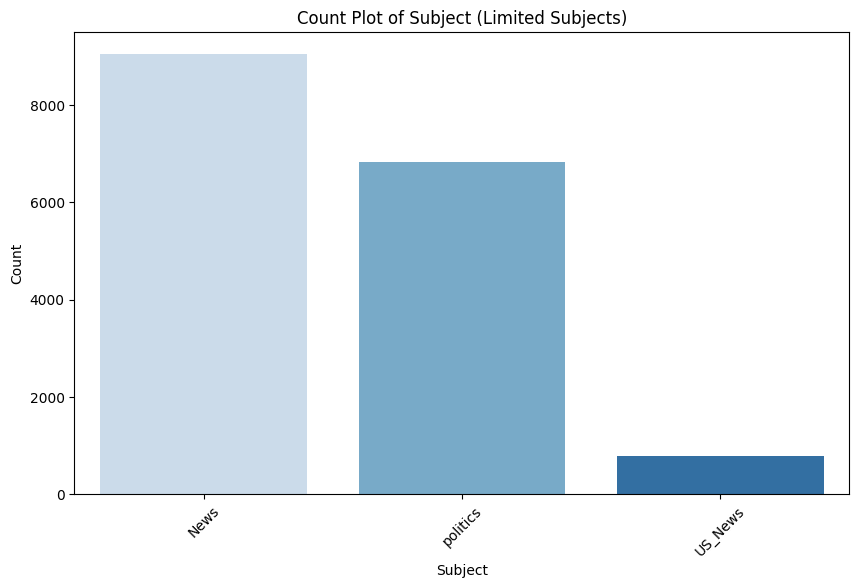

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# List of subjects to include in the plot
selected_subjects = ['News', 'US_News', 'politics']
# Filter the DataFrame to include only the selected subjects
fake_filtered = fake[fake['subject'].isin(selected_subjects)]

plt.figure(figsize=(10, 6))
sns.countplot(data=fake_filtered, x='subject', palette='Blues')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.title('Count Plot of Subject (Limited Subjects)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


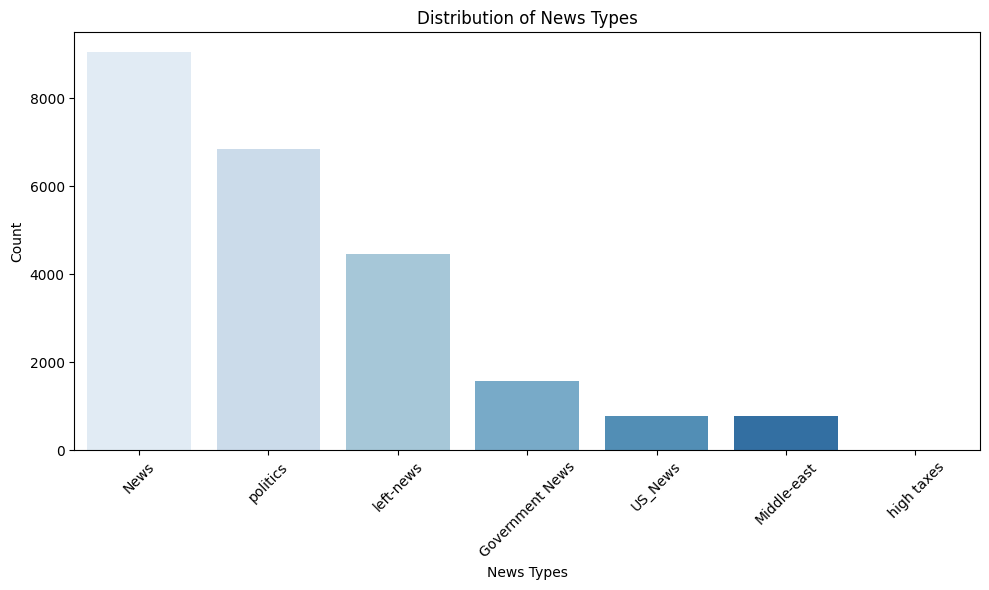

In [ ]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have a DataFrame called 'fake' with a 'subject' column
# Count the occurrences of each unique value in the 'subject' column
subject_counts = fake['subject'].value_counts()

# Select the top 7 subjects
top_subjects = subject_counts.head(7)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subjects.index, y=top_subjects.values, palette="Blues")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Set labels and title
plt.xlabel('News Types')
plt.ylabel('Count')
plt.title('Distribution of News Types')

plt.tight_layout()  # Ensure the labels are fully visible

# Display the plot
plt.show()


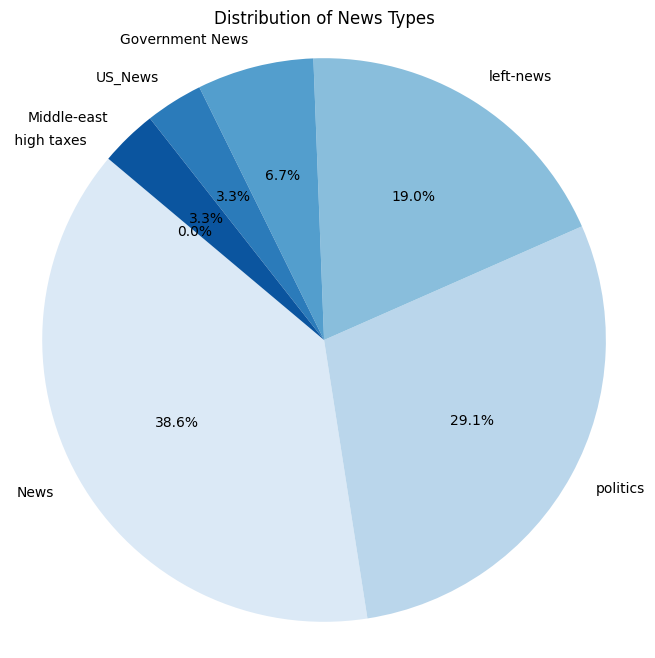

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming you have a DataFrame called 'fake' with a 'subject' column
# Count the occurrences of each unique value in the 'subject' column
subject_counts = fake['subject'].value_counts()

# Select the top 7 subjects
top_subjects = subject_counts.head(7)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_subjects, labels=top_subjects.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Blues"))
plt.title('Distribution of News Types')
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.show()


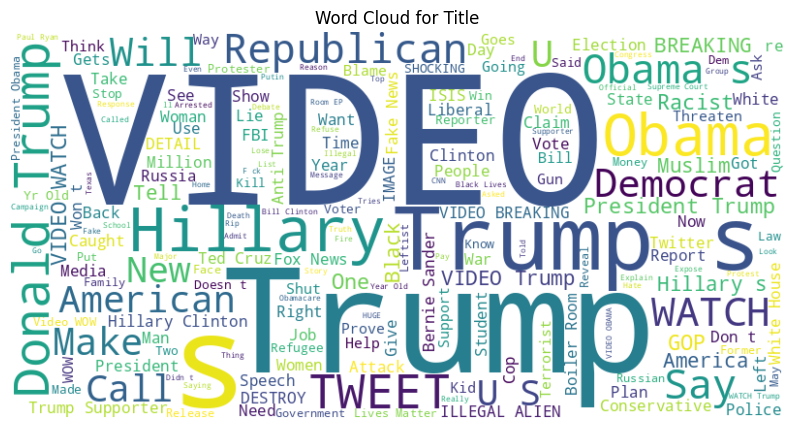

In [ ]:
from wordcloud import WordCloud

# Create a Word Cloud for 'title' column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(fake['title']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Title')
plt.show()


<ipython-input-33-289a841feb75>:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


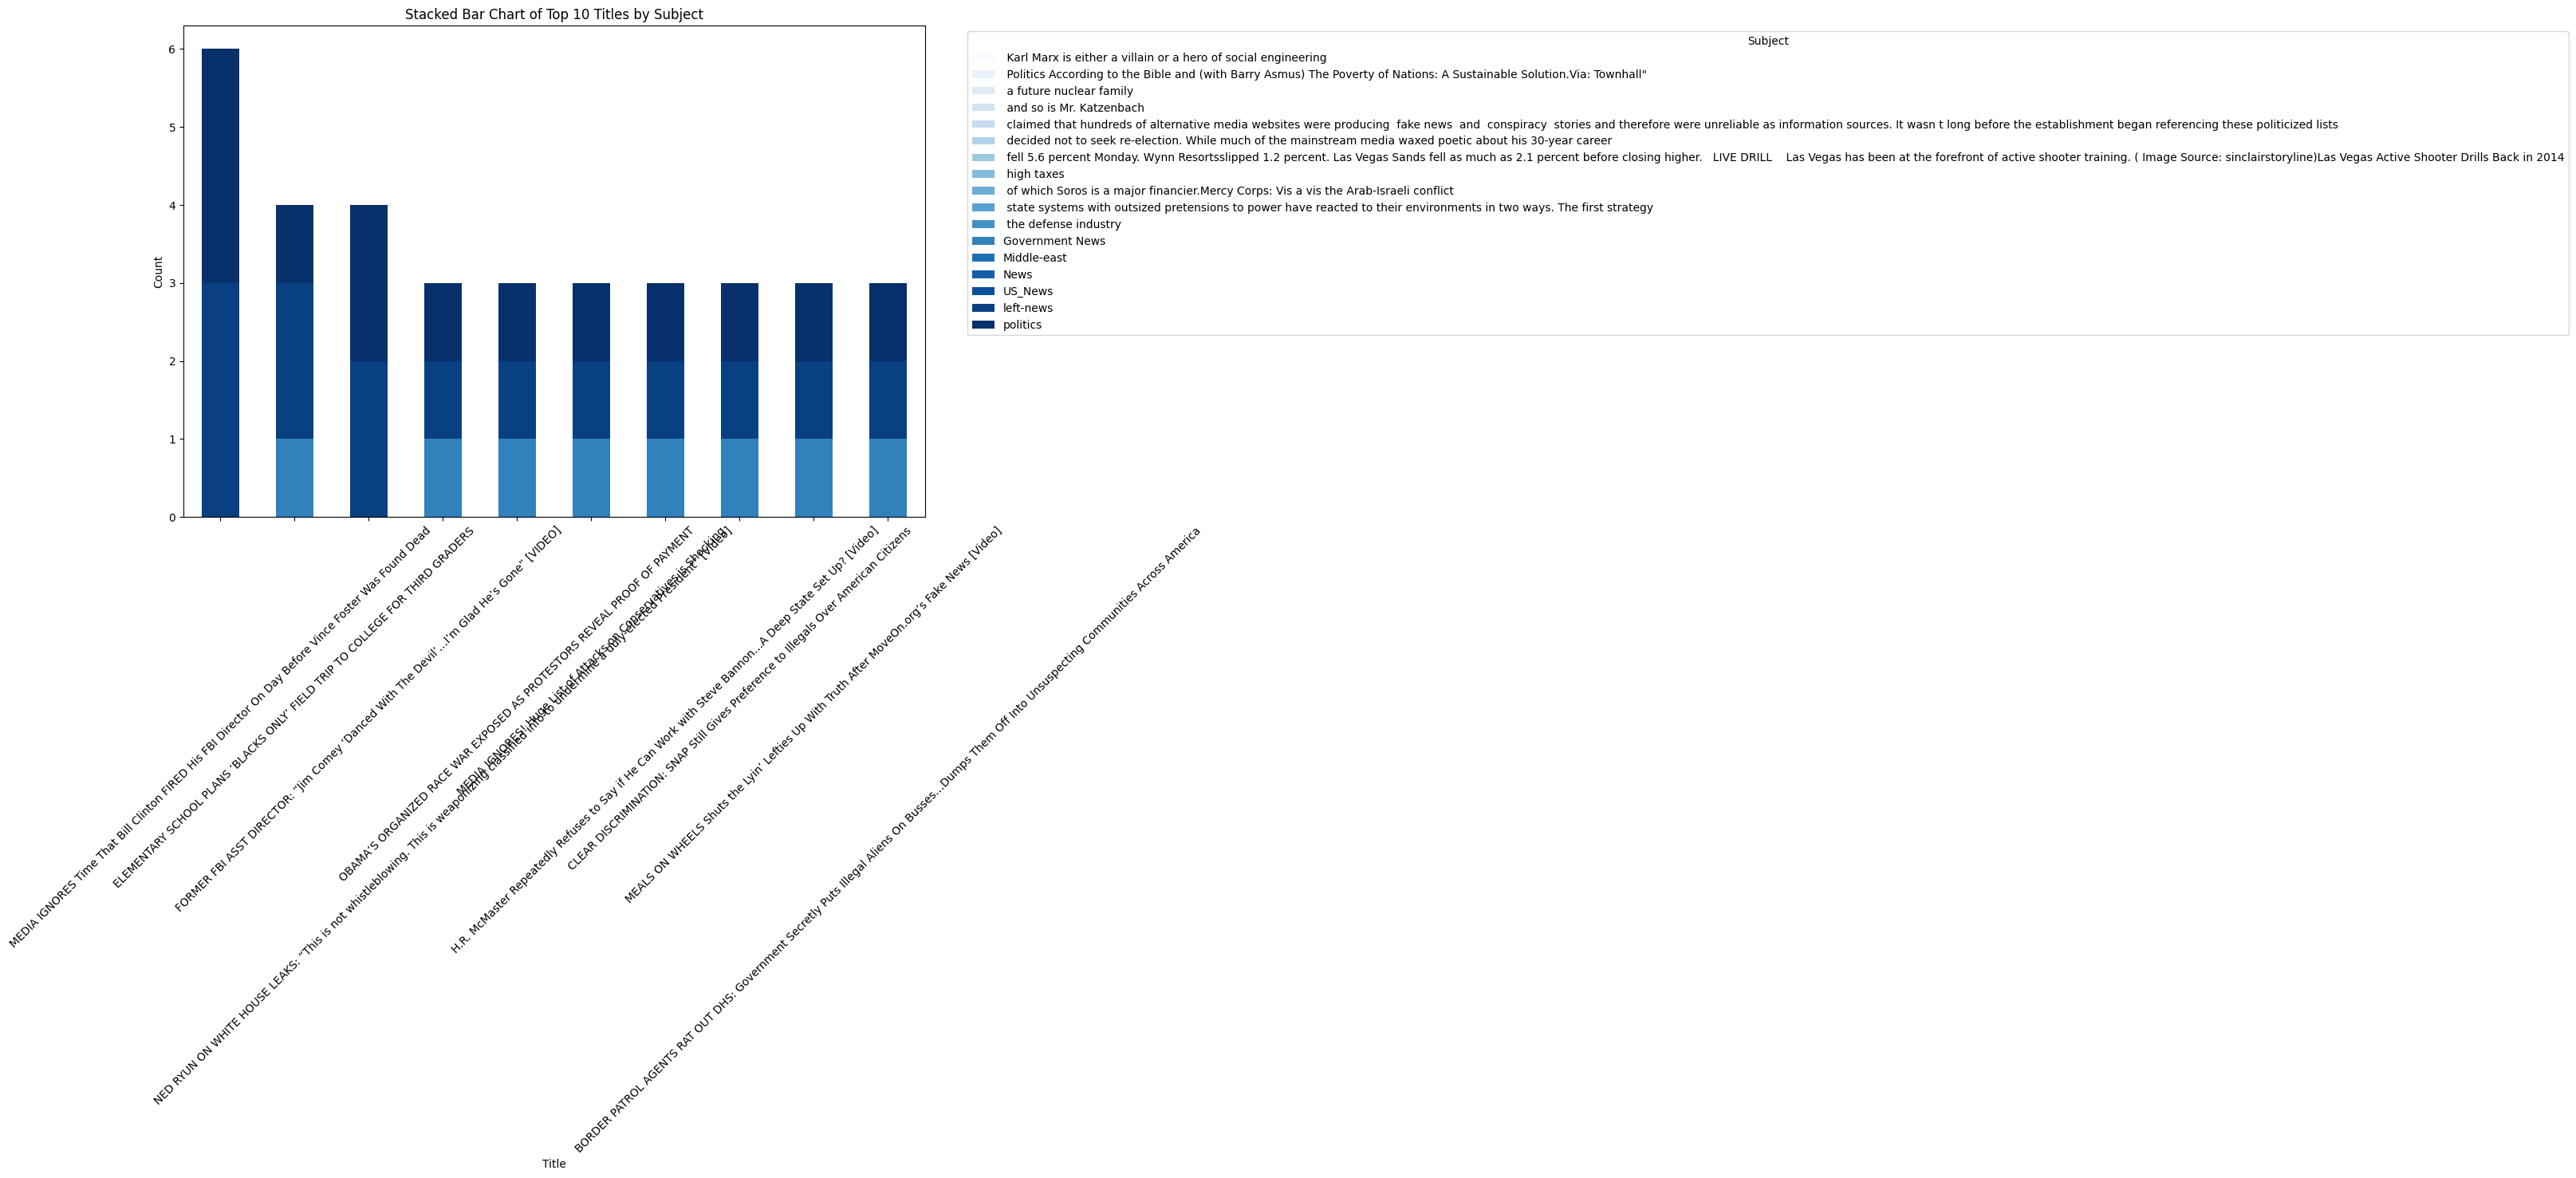

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'fake' with 'title' and 'subject' columns
# Create a pivot table to count the occurrences of each 'subject' within each 'title'
pivot_table = fake.pivot_table(index='title', columns='subject', aggfunc='size', fill_value=0)

# Sort the pivot table by the most common 'title'
pivot_table = pivot_table.loc[fake['title'].value_counts().index[:10]]

# Create a stacked bar chart using Seaborn
plt.figure(figsize=(12, 8))
pivot_table.plot(kind='bar', stacked=True, colormap='Blues', ax=plt.gca())

# Set labels and title
plt.xlabel('Title')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Top 10 Titles by Subject')

plt.xticks(rotation=45)
plt.legend(title='Subject', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


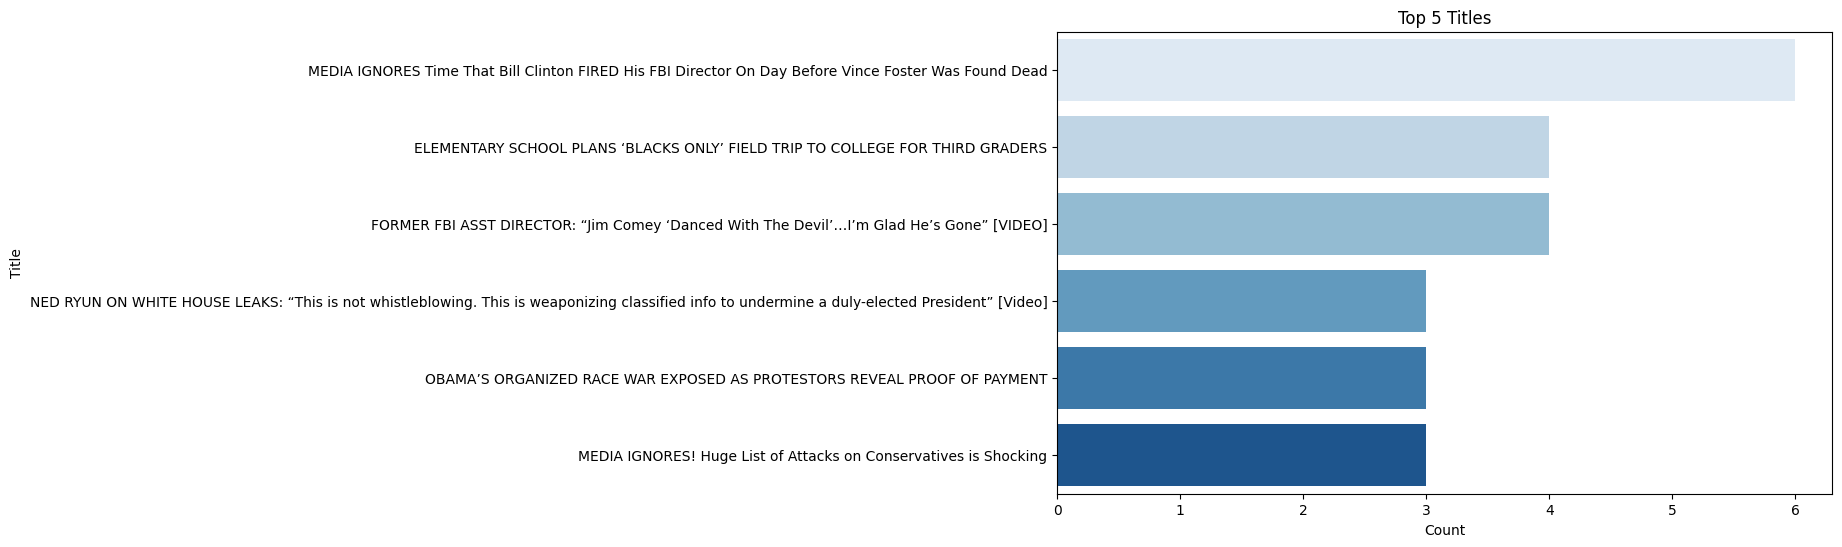

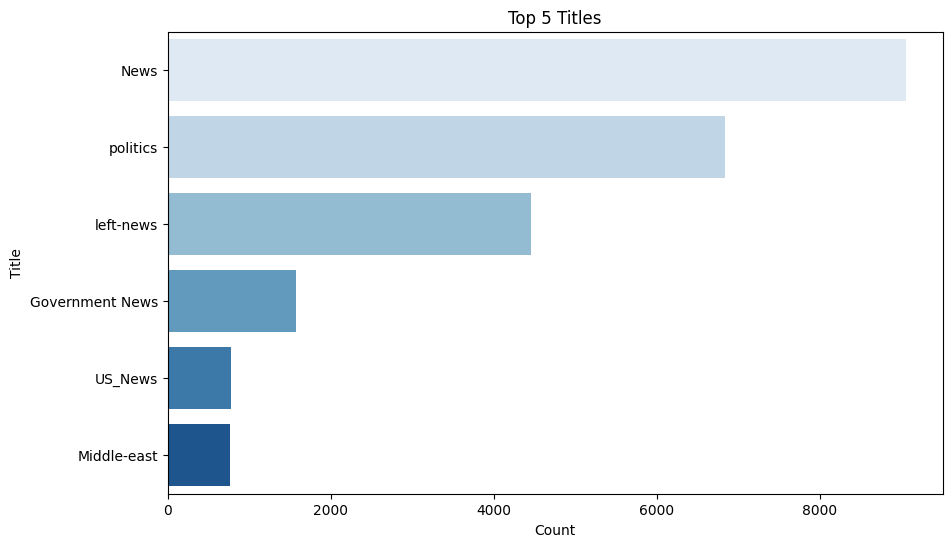

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
# fake = pd.read_csv("drive/My Drive/AI_Fakenews/fake.csv",low_memory=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=fake, y='title', palette="Blues", order=fake['title'].value_counts().iloc[:6].index)
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Top 5 Titles')
plt.show()
plt.figure(figsize=(10, 6))
sns.countplot(data=fake, y='subject', palette="Blues", order=fake['subject'].value_counts().iloc[:6].index)
plt.xlabel('Count')
plt.ylabel('Title')
plt.title('Top 5 Titles')
plt.show()

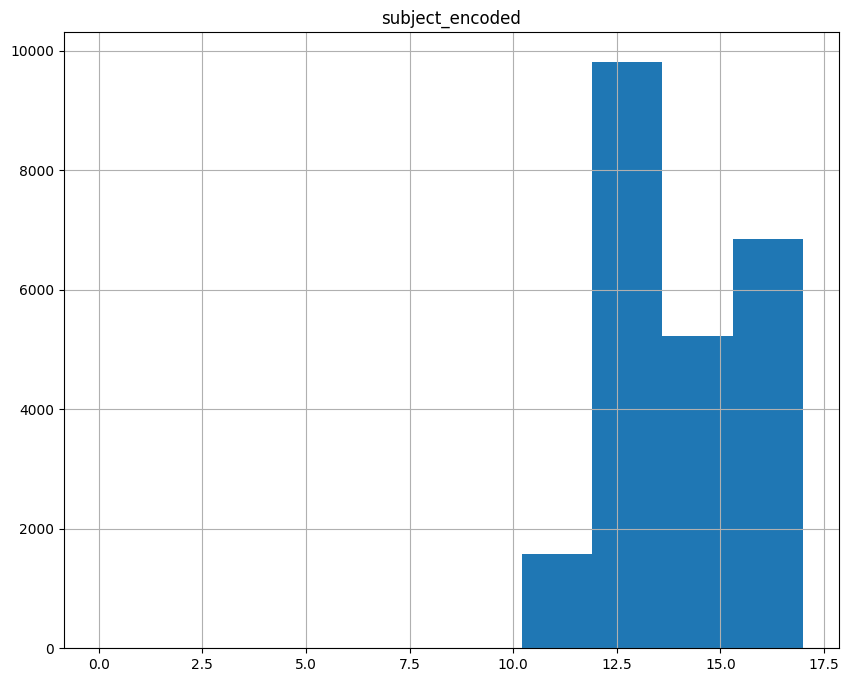

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'subject' column using .loc[]
fake.loc[:, 'subject_encoded'] = label_encoder.fit_transform(fake['subject'])

# Create histograms for the numerical columns
numerical_columns = ['subject_encoded']
fake[numerical_columns].hist(figsize=(10, 8))
plt.show()



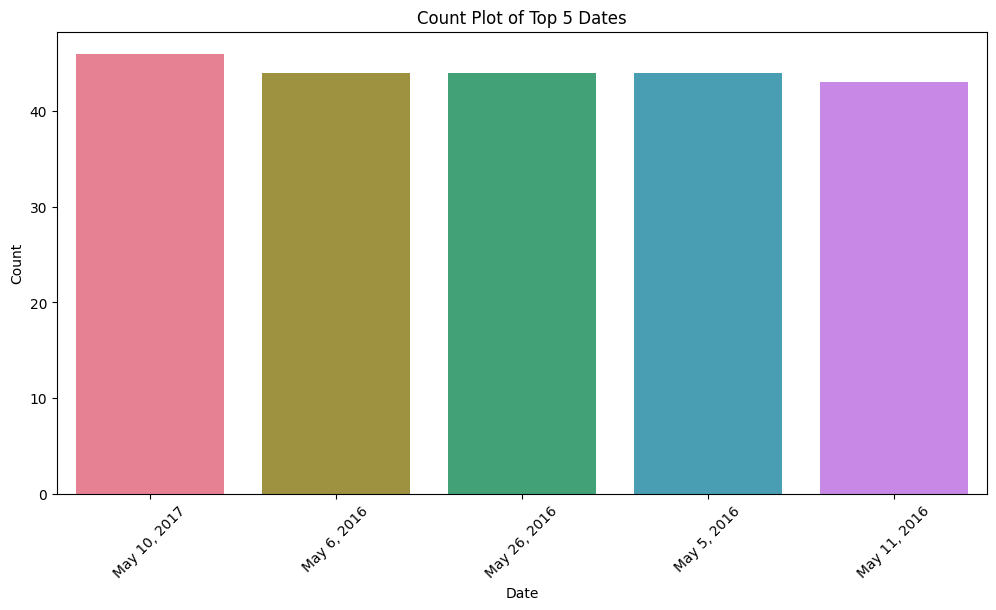

In [ ]:
# sns.countplot(data=fake, x='date')
# plt.show()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the top 5 most common 'date' values
top_5_dates = fake['date'].value_counts().head(5).index.tolist()

#Filter the dataset to include only rows with these top 'date' values
filtered_fake = fake[fake['date'].isin(top_5_dates)]

# Create the count plot for the filtered data
plt.figure(figsize=(12, 6))
custom_palette = sns.color_palette("husl", n_colors=len(top_5_dates))
sns.countplot(data=filtered_fake, x='date', palette=custom_palette, order=top_5_dates)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count Plot of Top 5 Dates')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


# **Load the combined dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


#fake_data = pd.read_csv("fake.csv")
# true = pd.read_csv("true.csv")
true_old = pd.read_csv("drive/My Drive/AI_Fakenews/true.csv",low_memory=False)
fake = pd.read_csv("drive/My Drive/AI_Fakenews/fake.csv",low_memory=False)
fake= fake.loc[:, ~fake.columns.str.contains('^Unnamed')]
true= true_old.loc[:, ~true_old.columns.str.contains('^Unnamed')]

# Label the data
fake['label'] = 1
true['label'] = 0

# Combine the datasets
combined_data = pd.concat([fake, true], ignore_index=True)


# **Text preprocessing**

In [ ]:
#Preprocess the text

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

def preprocess_text(text):
    # Remove special characters and numbers
    text = text.lower()
    text = ' '.join(word for word in text.split() if word.isalpha())

    # Tokenization and stopwords removal
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Stemming
    words = [ps.stem(word) for word in words]

    return ' '.join(words)

combined_data['text'] = combined_data['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#**Feature extraction and Model Training**

In [ ]:

# Split the dataset into training and testing sets
X = combined_data['text']
y = combined_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Label Encoding for the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Model Training
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train_encoded)

MultinomialNB()

#**Model Evaluation**

In [ ]:
# Model Evaluation
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy}")
print(classification_report(y_test_encoded, y_pred))
print(confusion_matrix(y_test_encoded, y_pred))


Accuracy: 0.9250890471950134
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4247
           1       0.92      0.93      0.93      4737

    accuracy                           0.93      8984
   macro avg       0.93      0.92      0.92      8984
weighted avg       0.93      0.93      0.93      8984

[[3888  359]
 [ 314 4423]]
